In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
dataset=pd.read_csv('tested.csv')

In [3]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [5]:
dataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [6]:
dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [7]:
dataset['Age']=dataset['Age'].fillna(dataset['Age'].mean())
dataset['Fare']=dataset['Fare'].fillna(dataset['Fare'].mean())


In [8]:
dataset['Fare']=dataset['Fare'].astype('int64')
dataset['Age']=dataset['Age'].astype('int64')

In [9]:
dataset['Age']

0      34
1      47
2      62
3      27
4      22
       ..
413    30
414    39
415    38
416    30
417    30
Name: Age, Length: 418, dtype: int64

In [10]:
dataset=dataset.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)

In [11]:
dataset.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,34,0,0,7,Q
1,1,3,female,47,1,0,7,S
2,0,2,male,62,0,0,9,Q
3,0,3,male,27,0,0,8,S
4,1,3,female,22,1,1,12,S


In [12]:
Embarked = dataset['Embarked'].unique()
Embarked

array(['Q', 'S', 'C'], dtype=object)

In [13]:
Pclass = dataset['Pclass'].unique()
Pclass

array([3, 2, 1], dtype=int64)

# Encoding

In [14]:
dataset['Embarked']=dataset['Embarked'].map({'Q':0,'S':1,'C':2}).astype('int64')
dataset['Sex']=dataset['Sex'].map({'male':0,'female':1}).astype('int64')


In [15]:
dataset.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,34,0,0,7,0
1,1,3,1,47,1,0,7,1
2,0,2,0,62,0,0,9,0
3,0,3,0,27,0,0,8,1
4,1,3,1,22,1,1,12,1


In [16]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Survived  418 non-null    int64
 1   Pclass    418 non-null    int64
 2   Sex       418 non-null    int64
 3   Age       418 non-null    int64
 4   SibSp     418 non-null    int64
 5   Parch     418 non-null    int64
 6   Fare      418 non-null    int64
 7   Embarked  418 non-null    int64
dtypes: int64(8)
memory usage: 26.2 KB


In [17]:
X=dataset.drop('Survived',axis=1)
y=dataset['Survived']

<AxesSubplot:xlabel='Survived', ylabel='count'>

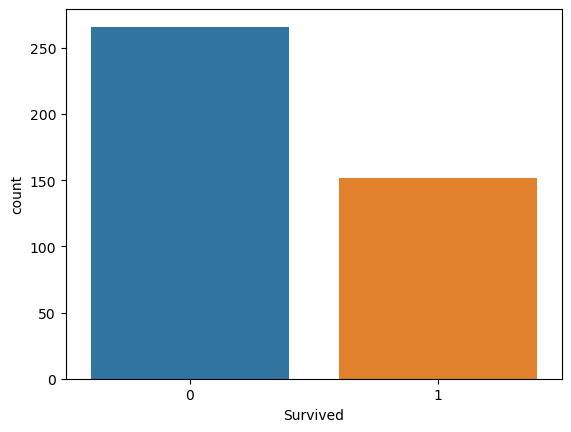

In [18]:

sns.countplot(x=y)


In [19]:
y.shape

(418,)

# Balance

<AxesSubplot:xlabel='Survived', ylabel='count'>

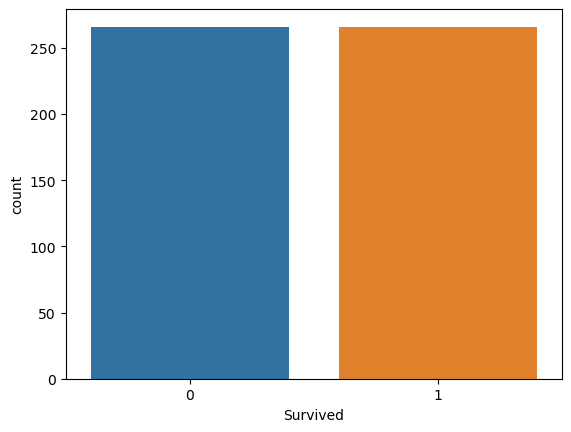

In [20]:
from imblearn.over_sampling import RandomOverSampler
sample=RandomOverSampler(random_state=42,sampling_strategy='auto')
X,y=sample.fit_resample(X, y)
sns.countplot(x=y)

# train_test_split

In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# MLPClassifier

In [23]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.neural_network import MLPClassifier
model = MLPClassifier(activation='tanh', max_iter=1000, early_stopping=True, validation_fraction=0.2, n_iter_no_change=10, random_state=42)
model.fit(X_train,y_train)
predict=model.predict(X_test)


In [24]:
train=model.score(X_train,y_train)
print("Train accuracy", train)
accuracy = accuracy_score(y_test, predict)

print("Test Accuracy:", accuracy)


Train accuracy 0.9674185463659147
Test Accuracy: 0.9398496240601504


In [25]:
report = classification_report(y_test, predict)
print(report )

              precision    recall  f1-score   support

           0       0.95      0.92      0.93        62
           1       0.93      0.96      0.94        71

    accuracy                           0.94       133
   macro avg       0.94      0.94      0.94       133
weighted avg       0.94      0.94      0.94       133



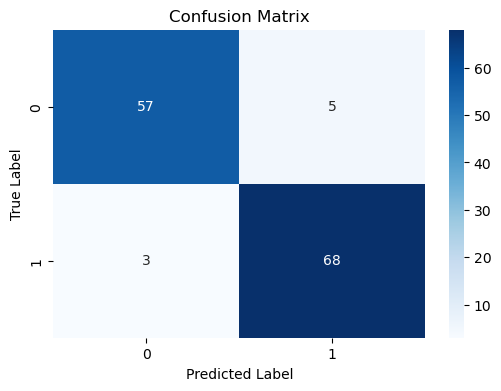

In [26]:
conf_matrix = confusion_matrix(y_test, predict)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

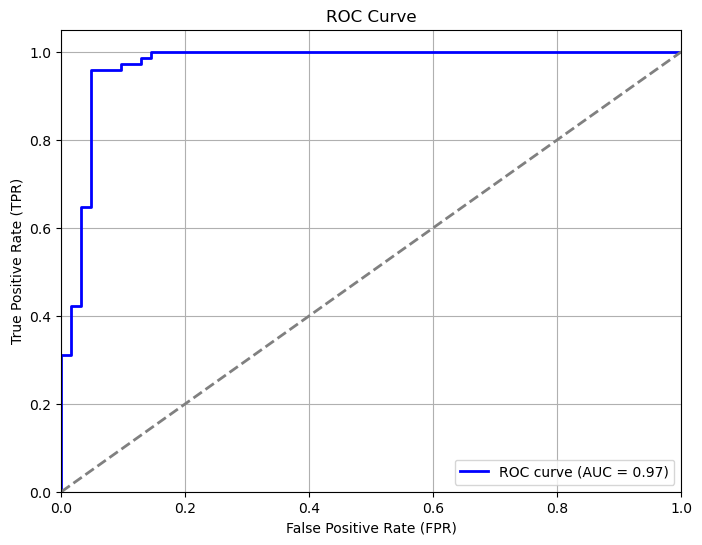

In [27]:
from sklearn.metrics import roc_curve, roc_auc_score
y_prob = model.predict_proba(X_test)[:, 1]

# Calculate the false positive rate, true positive rate, and thresholds for the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate the AUC-ROC score
auc_score = roc_auc_score(y_test, y_prob)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()